In [77]:
## Linear Regression ABC grocery

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV

In [3]:
data_for_model=pickle.load(open(r"C:\Users\12176\Desktop\lab\Data science\5. Machine_learning\2. Datasets/abc_reg_modelling.p", "rb"))

In [4]:
data_for_model.tail()

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
862,4,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,372,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,104,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,373,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392
869,712,0.07,M,0.70,0.991,3104.45,305,51,5,60.871569


In [5]:
## drop unneccessary columns
data_for_model.drop(["customer_id"], axis=1)

,distance_from_store,gender,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...
862,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [6]:
### shuffle the data
data_for_model = shuffle(data_for_model, random_state=42)

In [7]:
### dealing with missing values

In [8]:
data_for_model.isna().sum() ##not many missing values. we can just drop the row

customer_id               0
distance_from_store       2
gender                    3
credit_score              2
customer_loyalty_score    0
toatl_sales_cost          0
num_items                 0
transactions_id           0
product_area_id           0
average_basket_value      0
dtype: int64

In [9]:
data_for_model.dropna(how="any", inplace =True)


In [10]:
data_for_model.isna().sum()

customer_id               0
distance_from_store       0
gender                    0
credit_score              0
customer_loyalty_score    0
toatl_sales_cost          0
num_items                 0
transactions_id           0
product_area_id           0
average_basket_value      0
dtype: int64

In [11]:
### deal with outliers


In [12]:
outlier_investigatoin=data_for_model.describe()

In [13]:
outlier_investigatoin

,customer_id,distance_from_store,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,451.895939,2.021041,0.596117,0.509589,1846.502538,278.304569,44.926396,4.312183,36.781487
std,256.978077,2.566045,0.101352,0.294504,1767.829482,214.236424,21.248012,0.725054,19.337336
min,3.000000,0.000000,0.260000,0.002000,45.950000,10.000000,4.000000,2.000000,9.342000
25%,224.250000,0.710000,0.530000,0.263000,942.067500,201.000000,41.000000,4.000000,22.406953
50%,452.000000,1.645000,0.590000,0.510500,1471.490000,258.500000,50.000000,4.000000,30.365417
75%,680.250000,2.910000,0.660000,0.771500,2104.727500,318.500000,53.000000,5.000000,47.208474
max,869.000000,44.370000,0.880000,1.000000,9878.760000,1187.000000,109.000000,5.000000,102.335417


In [14]:
outlier_column=["distance_from_store","toatl_sales_cost",
               "num_items", "credit_score", "customer_loyalty_score", "average_basket_value" ]
for column in outlier_column:
    
    lower_qrt=data_for_model[column].quantile(0.25)
    upper_qrt=data_for_model[column].quantile(0.75)  
    inetrqrt_range = upper_qrt - lower_qrt
    Lower_boundary = lower_qrt - (inetrqrt_range* 2)
    Upper_boundary = upper_qrt + (inetrqrt_range* 2)
    outliers = data_for_model[(data_for_model[column] < Lower_boundary) | (data_for_model[column] > Upper_boundary)].index
    
    print(f"there were {len(outliers)} outliers detecetd")
    
    data_for_model.drop(outliers, inplace=True)

there were 2 outliers detecetd
there were 23 outliers detecetd
there were 0 outliers detecetd
there were 1 outliers detecetd
there were 0 outliers detecetd
there were 5 outliers detecetd


In [72]:
def outliers(list, num):
    for column in list:
    
        lower_qrt=data_for_model[column].quantile(0.25)
        upper_qrt=data_for_model[column].quantile(0.75)  
        inetrqrt_range = upper_qrt - lower_qrt
        Lower_boundary = lower_qrt - (inetrqrt_range* num)
        Upper_boundary = upper_qrt + (inetrqrt_range* num)
        outliers = data_for_model[(data_for_model[column] < Lower_boundary) | (data_for_model[column] > Upper_boundary)].index
        print(f"there were {len(outliers)} outliers detecetd in {column}")
    

In [73]:
outliers(["toatl_sales_cost"], 2)

there were 22 outliers detecetd in toatl_sales_cost


In [ ]:
outliers(["distance_from_store", "toatl_sales_cost"])

In [ ]:
### splitting dataset

In [54]:
X =data_for_model.drop(["customer_loyalty_score"], axis=1)
X.head()

,customer_id,distance_from_store,gender,credit_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
455,677,0.28,M,0.81,990.65,243,53,4,18.691509
621,333,2.58,F,0.58,333.26,70,13,4,25.635385
64,65,0.80,M,0.80,1753.96,371,52,5,33.730000
456,208,0.16,M,0.56,929.57,225,51,4,18.226863
196,438,3.27,F,0.67,1904.55,376,36,3,52.904167


In [55]:
y=data_for_model["customer_loyalty_score"]

In [56]:
regressor=LinearRegression()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [205]:
## DEALING WITH CATEGORICAL VARIABLES   # we use only transform on test dataset

In [206]:
encoder= OneHotEncoder(sparse=False,drop= "first")
cat_vars=["gender"]
X_train_encoder=encoder.fit_transform(X_train[cat_vars])
X_test_encoder=encoder.transform(X_test[cat_vars])
feature_names= encoder.get_feature_names(cat_vars)

In [207]:
## we have to do this for both X_train and X_test
X_train_encoder =pd.DataFrame(X_train_encoder, columns = feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoder.reset_index(drop=True)],axis=1)
X_train.drop(cat_vars, axis =1, inplace=True)

In [208]:
X_test_encoder =pd.DataFrame(X_test_encoder, columns = feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoder.reset_index(drop=True)],axis=1)
X_test.drop(cat_vars, axis =1, inplace=True)

In [209]:
X_train.head()

,customer_id,distance_from_store,credit_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value,gender_M
0,849,0.19,0.57,1096.96,202,53,5,20.697358,1.0
1,301,0.39,0.43,933.39,220,51,4,18.301765,1.0
2,794,2.27,0.49,1506.49,281,47,3,32.052979,0.0
3,615,3.10,0.59,330.79,81,13,4,25.445385,0.0
4,308,0.07,0.53,2053.04,210,54,5,38.019259,1.0


In [210]:
## Feature Selection

In [211]:
regressor=LinearRegression()
feature_selector= RFECV(regressor)
fit = feature_selector.fit(X_train, y_train)
optimal_feature_count =feature_selector.n_features_
print(f"Optimal no. of features: {optimal_feature_count}")

Optimal no. of features: 8


In [212]:
X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

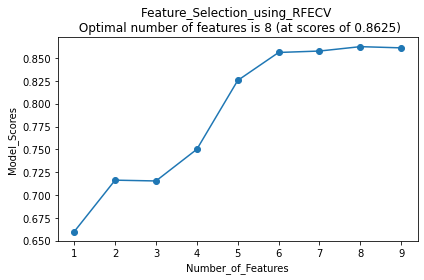

In [213]:
plt.plot(range(1, len(fit.grid_scores_)+1), fit.grid_scores_, marker="o")
plt.ylabel("Model_Scores")
plt.xlabel("Number_of_Features")
plt.title(f"Feature_Selection_using_RFECV \n Optimal number of features is {optimal_feature_count} (at scores of {round(max(fit.grid_scores_),4)})")
plt.tight_layout()
plt.show()

In [214]:
## Model fitting
regressor.fit(X_train, y_train)

LinearRegression()

In [215]:
y_pred=regressor.predict(X_test)

In [217]:
r_squared=r2_score(y_test, y_pred)
r_squared

0.7805702910327399

In [ ]:
#### Cross validation

In [220]:
cv = KFold(n_splits =4, shuffle =True, random_state = 42)
cv_scores= cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()

0.8532327536589749

In [221]:
### Calculate adjusted R-square

In [226]:
num_data_points, num_input_vars= X_test.shape
adjusted_R_square = 1 - (1 - r_squared) * (num_data_points - 1) /(num_data_points - num_input_vars -1)
print(adjusted_R_square)

0.7535635576213848


In [227]:
### Extracting Model coefficients

In [228]:
coefficients=pd.DataFrame(regressor.coef_)
var_name= pd.DataFrame(X_train.columns)
summary_stats=pd.concat([coefficients, var_name], axis=1)
summary_stats.columns=["coefficients", "var_name"]

In [229]:
summary_stats

,coefficients,var_name
0,-0.201232,distance_from_store
1,-0.027697,credit_score
2,0.000142,toatl_sales_cost
3,0.001002,num_items
4,-0.004842,transactions_id
5,0.061659,product_area_id
6,-0.003971,average_basket_value
7,-0.013393,gender_M


In [231]:
### Extracting intercept
regressor.intercept_

0.516097417464616